In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()

Saving S&P 500 Stock Prices 2014-2017.csv to S&P 500 Stock Prices 2014-2017.csv


In [ ]:
df = pd.read_csv('S&P 500 Stock Prices 2014-2017.csv')

# Konversi date
df['date'] = pd.to_datetime(df['date'])

# Sort data
df = df.sort_values(['symbol', 'date'])

# Hitung log return
df['log_return'] = np.log(df['close'] / df.groupby('symbol')['close'].shift(1))

# Drop missing
df = df.dropna()

In [ ]:
# Pivot table: date x symbol
pivot_returns = df.pivot(index='date', columns='symbol', values='log_return')

# Drop missing
pivot_returns = pivot_returns.dropna(axis=1)


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_returns)


In [ ]:
# PCA full
pca = PCA()
pca.fit(scaled_data)

explained_variance = pca.explained_variance_ratio_


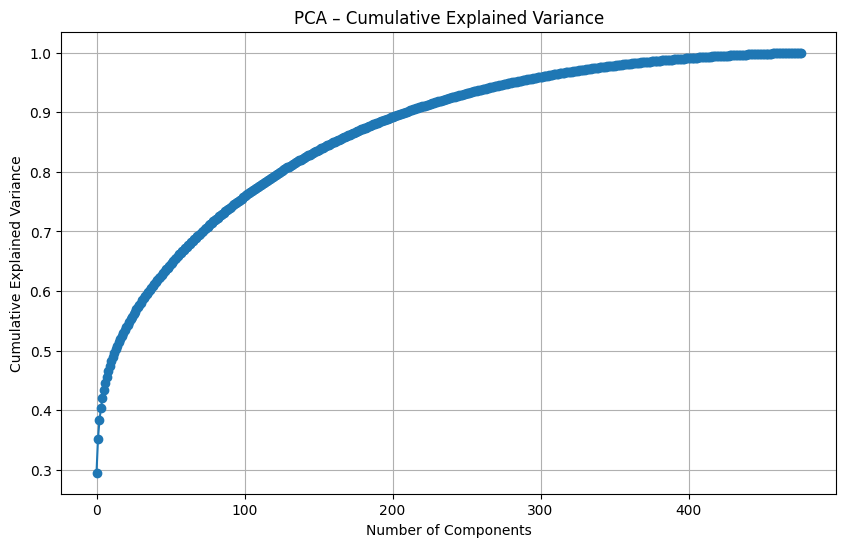

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA – Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [ ]:
# Misal ambil 3 komponen utama
pca_optimal = PCA(n_components=3)
principal_components = pca_optimal.fit_transform(scaled_data)

# DataFrame hasil PCA
pca_df = pd.DataFrame(
    principal_components,
    index=pivot_returns.index,
    columns=['PC1', 'PC2', 'PC3']
)

pca_df.head()


,PC1,PC2,PC3
date,,,
2014-01-03,1.844119,-0.643025,-2.000195
2014-01-06,-5.783260,0.533017,1.452991
2014-01-07,9.282448,3.182681,-0.220956
2014-01-08,0.182240,-5.180028,-4.146743
2014-01-09,3.359065,1.103517,-2.622192


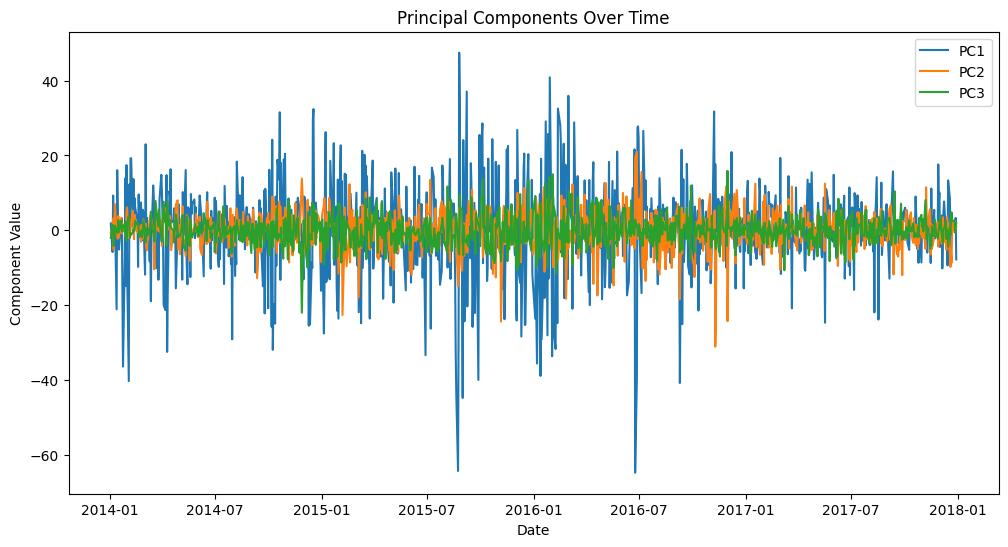

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(pca_df['PC1'], label='PC1')
plt.plot(pca_df['PC2'], label='PC2')
plt.plot(pca_df['PC3'], label='PC3')
plt.legend()
plt.title('Principal Components Over Time')
plt.xlabel('Date')
plt.ylabel('Component Value')
plt.show()


In [ ]:
loadings = pd.DataFrame(
    pca_optimal.components_.T,
    index=pivot_returns.columns,
    columns=['PC1', 'PC2', 'PC3']
)

loadings.head()


,PC1,PC2,PC3
symbol,,,
A,0.049080,-0.015861,-0.019243
AAL,0.043496,-0.016375,-0.059505
AAP,0.032120,0.007105,-0.011747
AAPL,0.041264,-0.000069,-0.024552
ABBV,0.040118,0.004500,-0.033757
